<a href="https://colab.research.google.com/github/manassuranjan/Rock_paper_scissor_game/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE  # ✅ NEW


In [ ]:
df = pd.read_csv("/content/sample_data/creditcard.csv")
print(df)

        Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
25833  33785 -0.187402  0.445507  2.199225  3.030535 -0.361376  1.095100   
25834  33785  1.237064  0.312096  0.191934  0.496764 -0.129777 -0.551625   
25835  33785  1.245292 -0.594493  0.275982 -0.578346 -0.920599 -0.865570   
25836  33787 -0.697373  0.401180  0.803750 -1.015524 -0.226100  0.283660   
25837  33787  1.303469  0.498450       NaN       NaN       NaN       NaN   

             V7        V8        V9  ...       V21       V22       V23  \
0      0.2395

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

In [ ]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

CLASS DISTRIBUTION

In [ ]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


No Frauds 99.66 % of the dataset
Frauds 0.34 % of the dataset


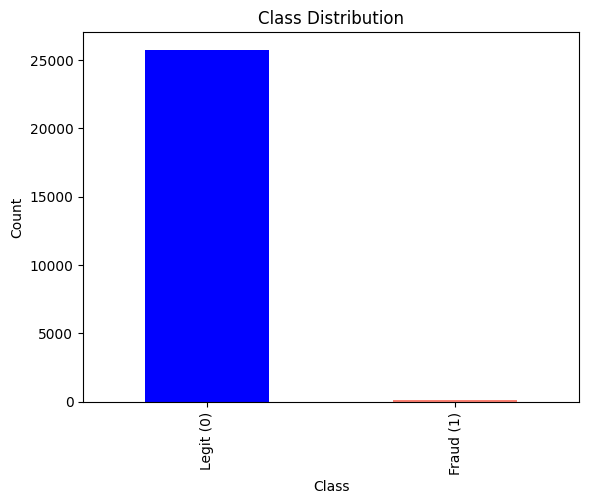

In [ ]:
df['Class'].value_counts().plot(kind='bar', color=['blue', 'salmon'])
plt.title("Class Distribution")
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.show()


In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


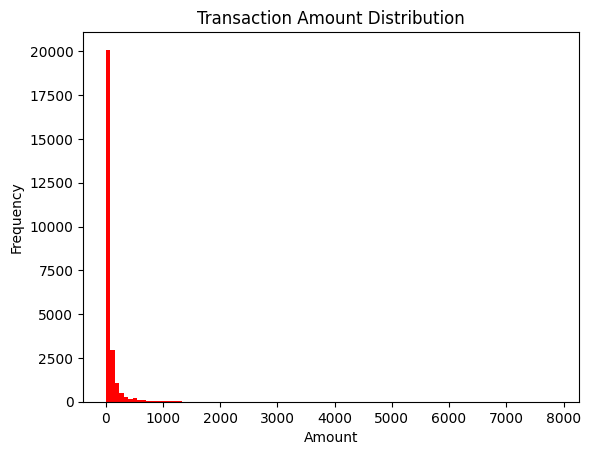

In [ ]:
plt.hist(df['Amount'], bins=100, color='red')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


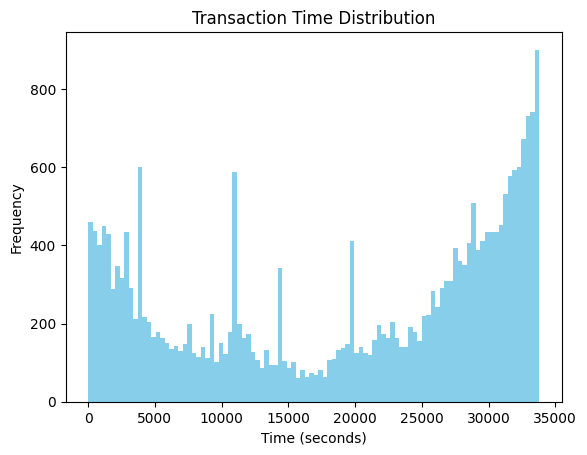

In [ ]:

plt.hist(df['Time'], bins=100, color='skyblue')
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df['Amount_scaled'] = StandardScaler().fit_transform(df[['Amount']])
df['Time_scaled'] = StandardScaler().fit_transform(df[['Time']])

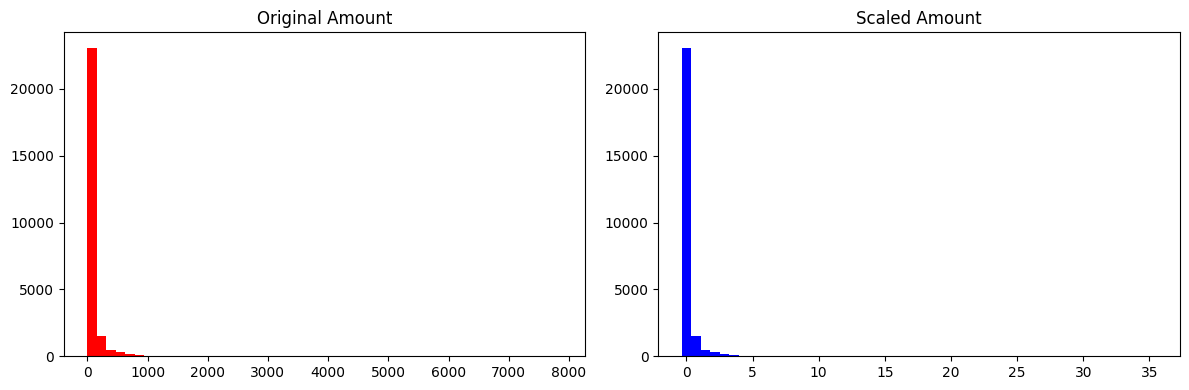

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(df['Amount'], bins=50, color='red')
axs[0].set_title("Original Amount")
axs[1].hist(df['Amount_scaled'], bins=50, color='blue')
axs[1].set_title("Scaled Amount")
plt.tight_layout()
plt.show()

In [ ]:
df_model = df.drop(['Time', 'Amount'], axis=1)
print(df_model.shape)

(25838, 31)


In [ ]:
# Train-test split
# Drop rows with NaN values from df_model before splitting
df_model.dropna(inplace=True)
X = df_model.drop("Class", axis=1)
y = df_model["Class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

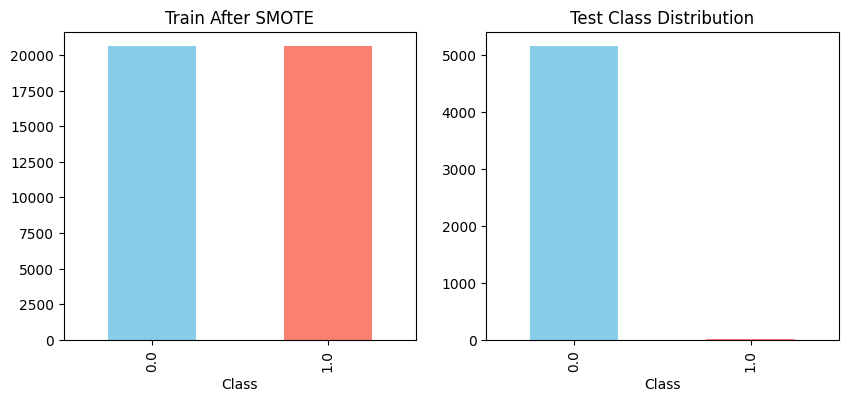

In [ ]:

# ✅ Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Plot class distribution after SMOTE
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
y_train_smote.value_counts().plot(kind='bar', ax=axs[0], title='Train After SMOTE', color=['skyblue', 'salmon'])
y_test.value_counts().plot(kind='bar', ax=axs[1], title='Test Class Distribution', color=['skyblue', 'salmon'])
plt.show()


In [ ]:
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n📌 {model_name} Results")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Create subplots for confusion matrix and ROC curve
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f"{model_name} - Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        axes[1].plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].set_title("ROC Curve")
        axes[1].legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


📌 Logistic Regression Results
Accuracy: 0.9881965944272446
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      5150
         1.0       0.23      1.00      0.37        18

    accuracy                           0.99      5168
   macro avg       0.61      0.99      0.68      5168
weighted avg       1.00      0.99      0.99      5168



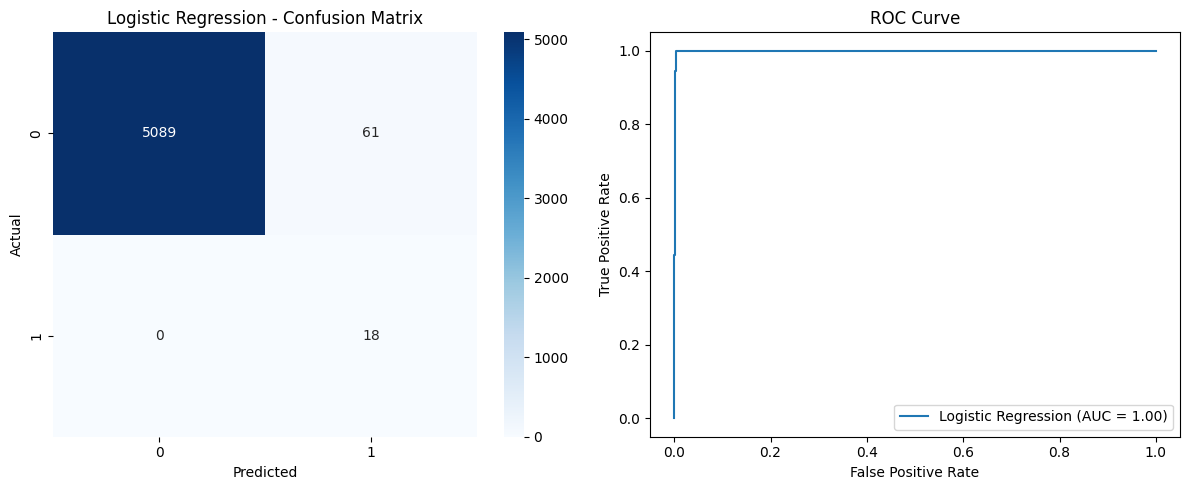

In [ ]:
# Train models using SMOTE-balanced data
def module_logistic_regression():
    model = LogisticRegression(max_iter=1000)
    train_and_evaluate_model(model, "Logistic Regression", X_train_smote, X_test, y_train_smote, y_test)
module_logistic_regression()


📌 Random Forest Results
Accuracy: 0.9992260061919505
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5150
         1.0       0.85      0.94      0.89        18

    accuracy                           1.00      5168
   macro avg       0.92      0.97      0.95      5168
weighted avg       1.00      1.00      1.00      5168



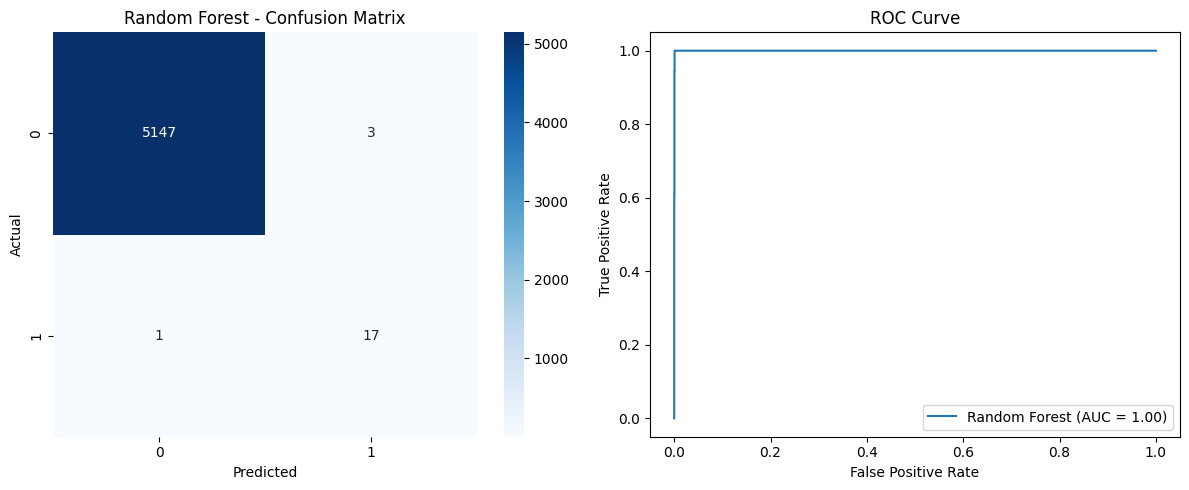

In [ ]:
def module_random_forest():
    model = RandomForestClassifier(n_estimators=100)
    train_and_evaluate_model(model, "Random Forest", X_train_smote, X_test, y_train_smote, y_test)
module_random_forest()



📌 K-Nearest Neighbors Results
Accuracy: 0.9984520123839009
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5150
         1.0       0.69      1.00      0.82        18

    accuracy                           1.00      5168
   macro avg       0.85      1.00      0.91      5168
weighted avg       1.00      1.00      1.00      5168



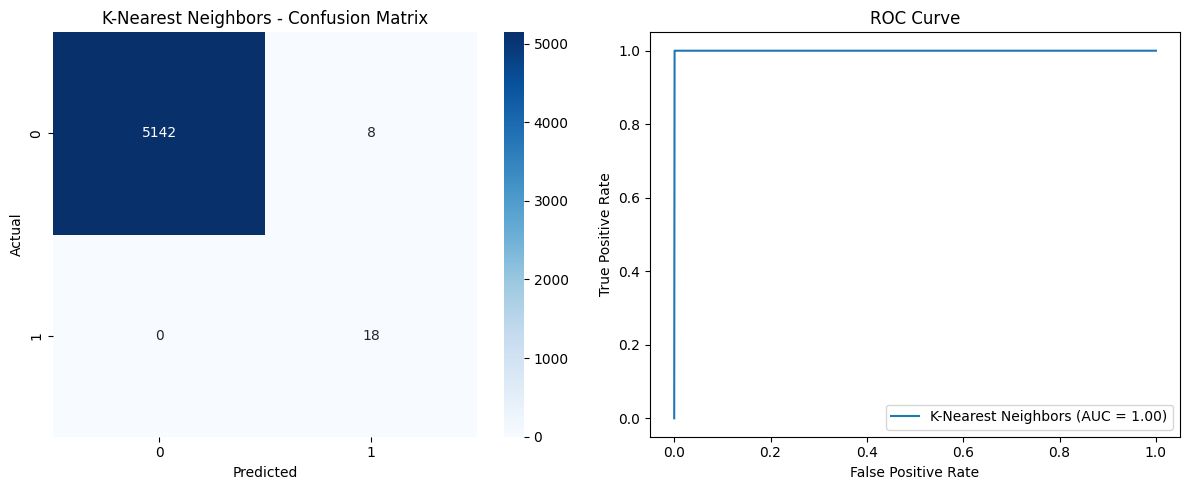

In [ ]:
def module_knn():
    model = KNeighborsClassifier(n_neighbors=5)
    train_and_evaluate_model(model, "K-Nearest Neighbors", X_train_smote, X_test, y_train_smote, y_test)
module_knn()


📌 Naive Bayes Results
Accuracy: 0.9771671826625387
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5150
         1.0       0.13      0.94      0.22        18

    accuracy                           0.98      5168
   macro avg       0.56      0.96      0.61      5168
weighted avg       1.00      0.98      0.99      5168



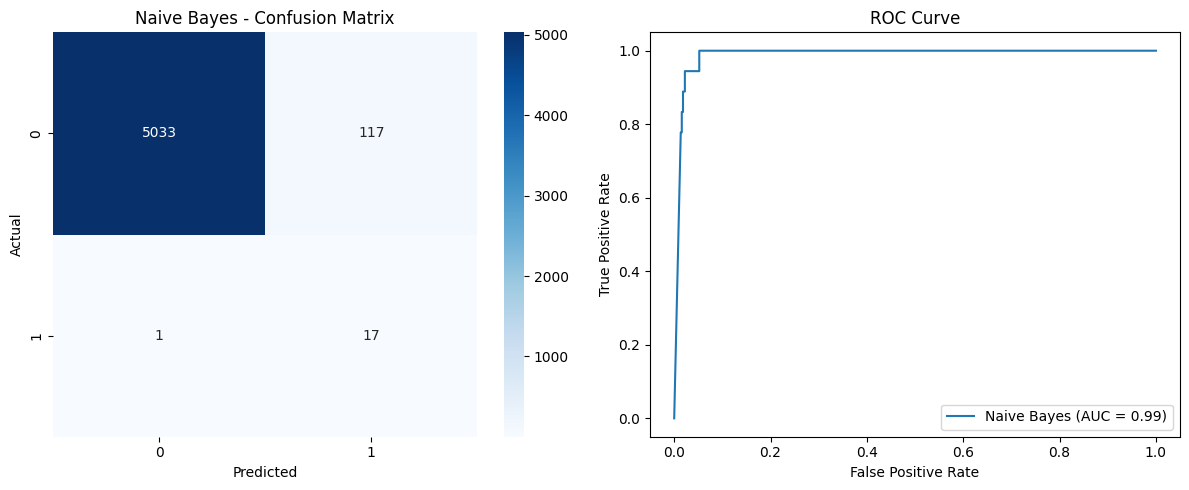

In [ ]:
def module_naive_bayes():
    model = GaussianNB()
    train_and_evaluate_model(model, "Naive Bayes", X_train_smote, X_test, y_train_smote, y_test)
module_naive_bayes()

In [ ]:
# Model comparison
models = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (RandomForestClassifier(n_estimators=100), "Random Forest"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (GaussianNB(), "Naive Bayes")
]


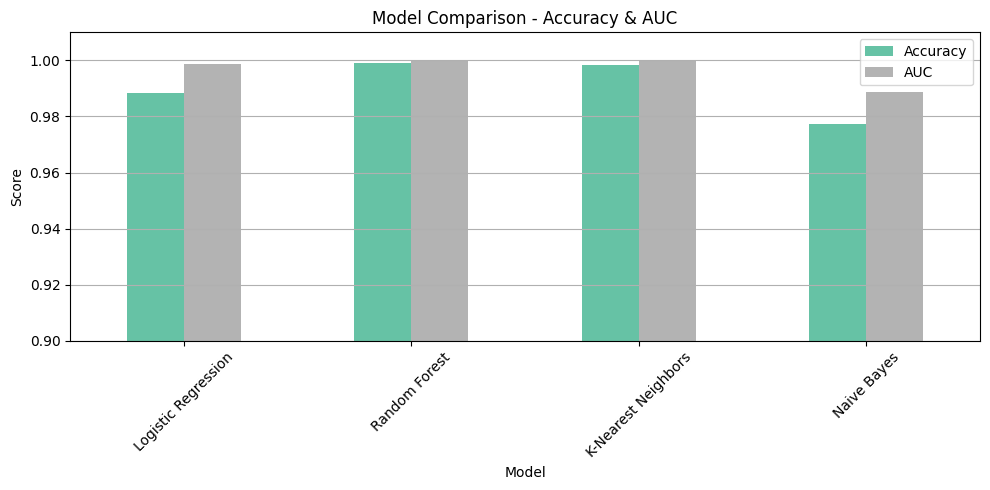

In [ ]:
results = []
for model, name in models:
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    results.append((name, acc, auc))

# Plot results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "AUC"])
results_df.set_index("Model").plot(kind='bar', figsize=(10, 5), colormap='Set2')
plt.title("Model Comparison - Accuracy & AUC")
plt.ylabel("Score")
plt.ylim(0.90, 1.01)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()